# House Price Prediction using advanced regression

## Problem statement

A US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. The company has collected a data set from the sale of houses in Australia. The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


## The solution is divided into the following sections: 
- Data understanding
- Data cleaning (Clean the data i.e. replace the null or derived the column values if they are null)
- Data Visualization (Plot the graph between variables to understand relation)
- Data preparation (As part of this create dummy variables for required columns)
- Model building and evaluation
- Observations

## 1. Data understanding
- Data exploration (analyse both categorical and analytical columns)
- Data cleaning & imputing
- Data visualisation (i.e. Sales price vs categorical and numerical variables.)

In [1]:
#import the libraries required for further analysis
#Load the libraries which will be required further for analysis

import numpy as np
import pandas as pd
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_location_prefix = '/Users/nyashasingh/Desktop/upgrad/upgrad-case-studies-solutions/sem-2'
data_location = data_location_prefix + '/assignment'
print('data_location : ', data_location)

data_location :  /Users/nyashasingh/Desktop/upgrad/upgrad-case-studies-solutions/sem-2/assignment


In [3]:
#load the data
data_location = data_location + "/train.csv"
house_pricing = pd.read_csv(data_location)
house_pricing.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#size of dataset
house_pricing.shape 

(1460, 81)

In [5]:
#check the columns and nullable values i.e. number of records null
house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Check the summary of the numerical data i.e. percentile. For outlier we can check 75% of the data set and compared with 90%, 95%, 99%
- For additional information, print 90, 95 & 99 percentil of the data to check outliers.


In [6]:
house_pricing.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1

### 1.2 Data Cleaning and imputing.
As part of data cleaning, a number of checks will be performed

- Drop duplicates
- Data Imputing (categorical & numeric)


### 1.2.1 Drop duplicates

<font color="red">Observations:</font> No duplicate records were found

In [7]:
print("Shape before dropping duplicates : ", house_pricing.shape)
house_pricing.drop_duplicates()
print("Shape after dropping duplicates : ", house_pricing.shape)

Shape before dropping duplicates :  (1460, 81)
Shape after dropping duplicates :  (1460, 81)


### 1.2.2 Data Imputing
- Check for columns with missing values and replace with appropriate values

<font color="red">Observations:</font> As part of this step, 
- A number of categorical columns where feature was not available were marked "none"
- Numerical columns were replaced with median values. (LotFrontage, GarageYrBlt, MasVnrArea, Electrical)

In [8]:
# function to print column with missing values
def print_column_with_missing_values(data_frame):
    column_with_null_values = round(100* (data_frame.isnull().sum().sort_values(ascending = False)/len(data_frame.index)), 2)
    column_with_null_values = column_with_null_values[column_with_null_values>0]
    print(column_with_null_values)

In [9]:
print_column_with_missing_values(house_pricing)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


### 1.2.2.1 Categorical columns
- As per data dictionary replace categorical (feature) columns missing values as None, where it dictates the availabbility of feature

#### Update the missing column values with none.

In [10]:
columns_with_missing_features = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", "GarageCond" , 
"GarageType", "GarageFinish", "GarageQual", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual", "MasVnrType"]
for column_name in columns_with_missing_features:
    house_pricing[column_name].fillna("none", inplace=True)

print_column_with_missing_values(house_pricing)

LotFrontage    17.74
GarageYrBlt     5.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64


### 1.2.2.2 Numeric columns
 - Replace the numerical columns with their median values
 
#### Update the column values with median

In [11]:
house_pricing["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [12]:
house_pricing["GarageYrBlt"].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [13]:
house_pricing["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [14]:
house_pricing["Electrical"].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [15]:
### As per data dictionary LotFrontage: Linear feet of street connected to property
house_pricing['LotFrontage'] = house_pricing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house_pricing["GarageYrBlt"].fillna(house_pricing["GarageYrBlt"].median(), inplace=True)
house_pricing["MasVnrArea"].fillna(house_pricing["MasVnrArea"].median(), inplace=True)
house_pricing["Electrical"].dropna(inplace=True)

In [16]:
#Check again for columns with null or missing values
print_column_with_missing_values(house_pricing)

Electrical    0.07
dtype: float64


In [17]:
house_pricing.shape

(1460, 81)

### 1.3 Data visualisation (i.e. Sales price vs categorical and numerical variables.)

#### As per the data definition, sales price should be increasing with overall condition, overall quality and neighborhood. We analyse the data by plotting the graph between variables

#### 1.3.1 Graph (Sale price vs Neighborhood)
<font color="red">Observations:</font>In some of the Neighborhood Saleprice is quite high.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

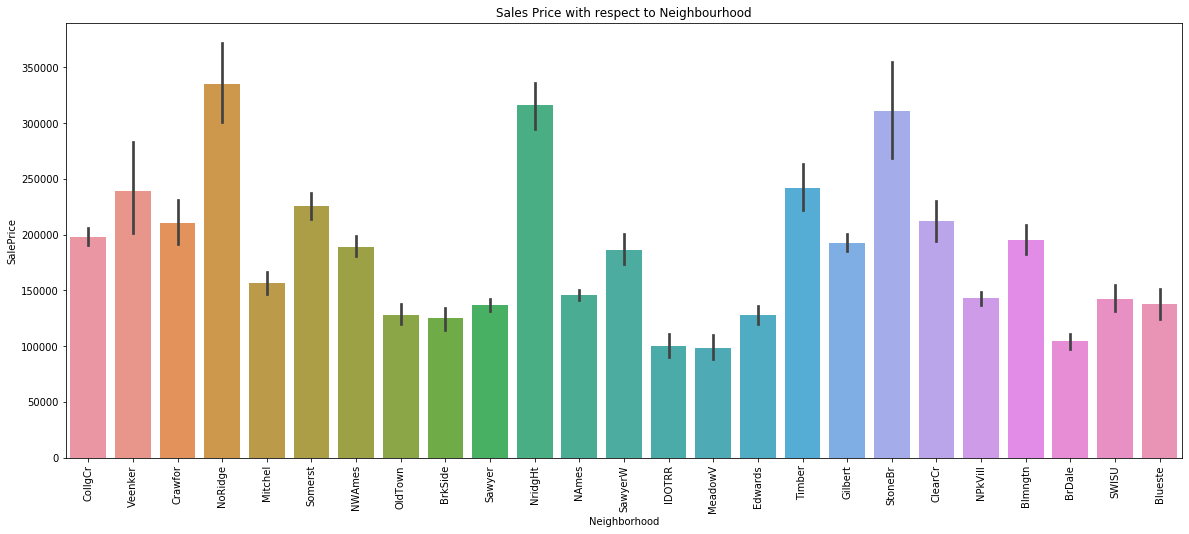

In [18]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data = house_pricing)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

#### 1.3.2 Graph (Sale price vs Neighborhood)
<font color="red">Observations:</font> Sales price increases as overall condition of the house increases

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

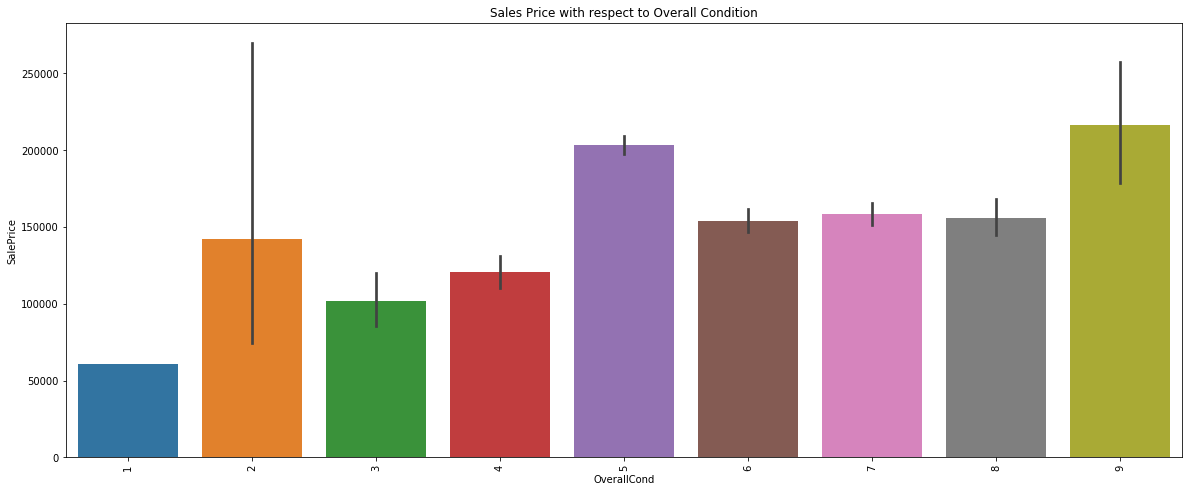

In [19]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data = house_pricing)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

#### 1.3.3 Graph (Sale price vs Neighborhood)
<font color="red">Observations:</font> Sales price increases as overall quality of the house increases

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

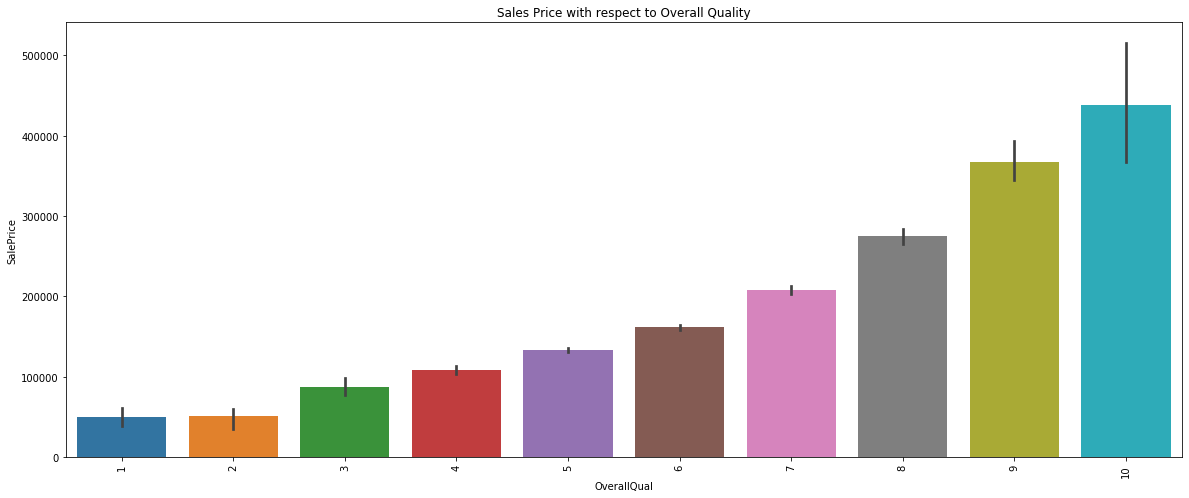

In [20]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data = house_pricing)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

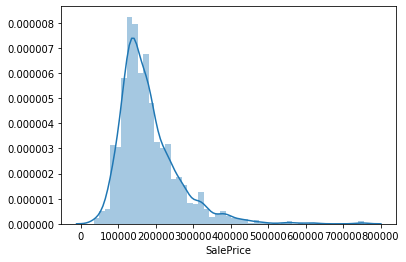

In [21]:
### Check the distribution of sales price. We can see that data is skewed towards left. it means a log transformation may be needed
sns.distplot(house_pricing['SalePrice'])

In [22]:
house_pricing['SalePrice'] = np.log(house_pricing['SalePrice'])
house_pricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247694
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109011
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317167
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429216


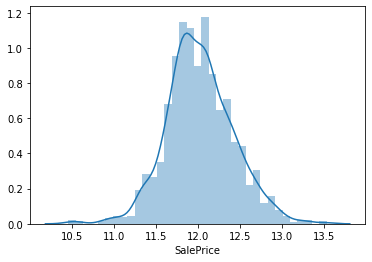

In [23]:
### Check the distribution of sales price again
sns.distplot(house_pricing['SalePrice'])

### 1.3.4 Numerical columns analysis
- Analyse the numerical columns and check the distribution of the data i.e. percentile of the data is distributed

<font color="red">Observations:</font>
- For some of the columns (PoolArea, ScreenPorch, EnclosedPorch, MiscVal, OpenPorchSF) range/spread i.e. difference between 25% & 75% is zero.
- For some of the columns (For ex: MSSubClass, LotFrontage, LotArea) there is a huge difference between 90% of the data and 99%/max.
- For most of the columns data is in range i.e. 90% of the data and 99% are close.
    

In [24]:
# Select the numeric columns
house_pricing_numeric = house_pricing.select_dtypes(include=['float64', 'int64'])
print('Number of numeric columns: ', house_pricing_numeric.columns.size)
print(house_pricing_numeric.columns)

Number of numeric columns:  38
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [25]:
# print the data with percentiles including 90, 95 & 99 to observe distribtion of data
house_pricing_numeric.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,421.610009,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,1680.000000,954.200000,0.000000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,9.000000,1.000000,2006.000000,3.000000,757.100000,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,12.535376
95%,1387.050000,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,12.694958
99%,1445.410000,190.000000,137.41000

### Correlation matrix and pairplot analysis
<font color="red">Observations:</font> Variables seem to have high correlations with each and others and may be dropped as it may cause multi-colinearity
- Garage area vs Garage cars
- GarageYrBuilt vs YearBuilt
- TotRmsAbvGrd vs GrivArea/2ndFloorSF/BedroomAbvGr

In [26]:
# correlation matrix
corr = house_pricing_numeric.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.003381,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.000122,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942
MSSubClass,0.011156,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.003381,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.031873,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,-0.005627,0.332619,0.249295,0.062380,0.281393,0.339085,0.088736,0.141734,0.008057,0.064654,0.041063,0.174567,0.005332,0.007370,0.004756,0.353288
LotArea,-0.033226,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,-0.028365,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184
OverallCond,0.012609,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868
YearBuilt,-0.012713,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570
YearRemodAdd,-0.021998,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608
MasVnrArea,-0.051071,0.023573,0.195830,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.426775
BsmtFinSF1,-0.005024,-0.069836,0.232576,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

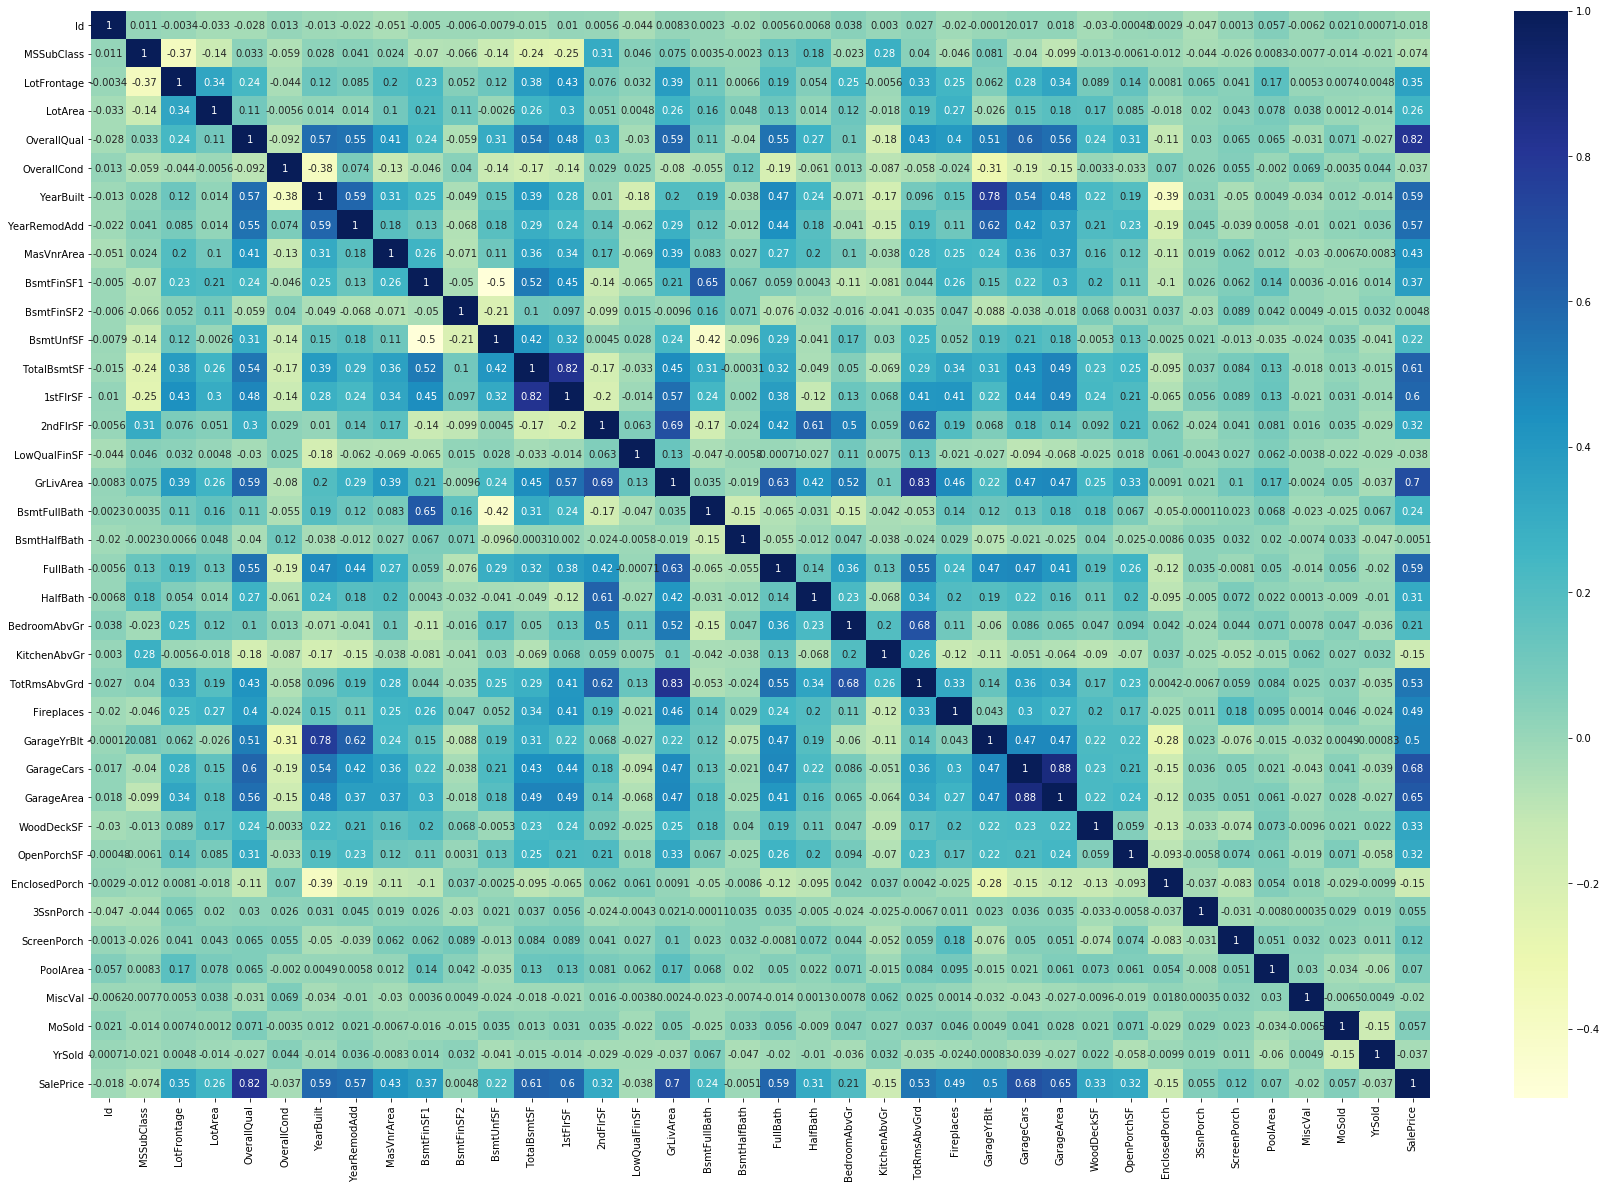

In [27]:
# plot the heatmap to observe the matrix
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Pairplot analysis for some of the important variables. 
#### For feature variables, we perform variation to find out if the variance of dataset is good. They may not be useful if data set variance is very low


<Figure size 2160x2160 with 0 Axes>

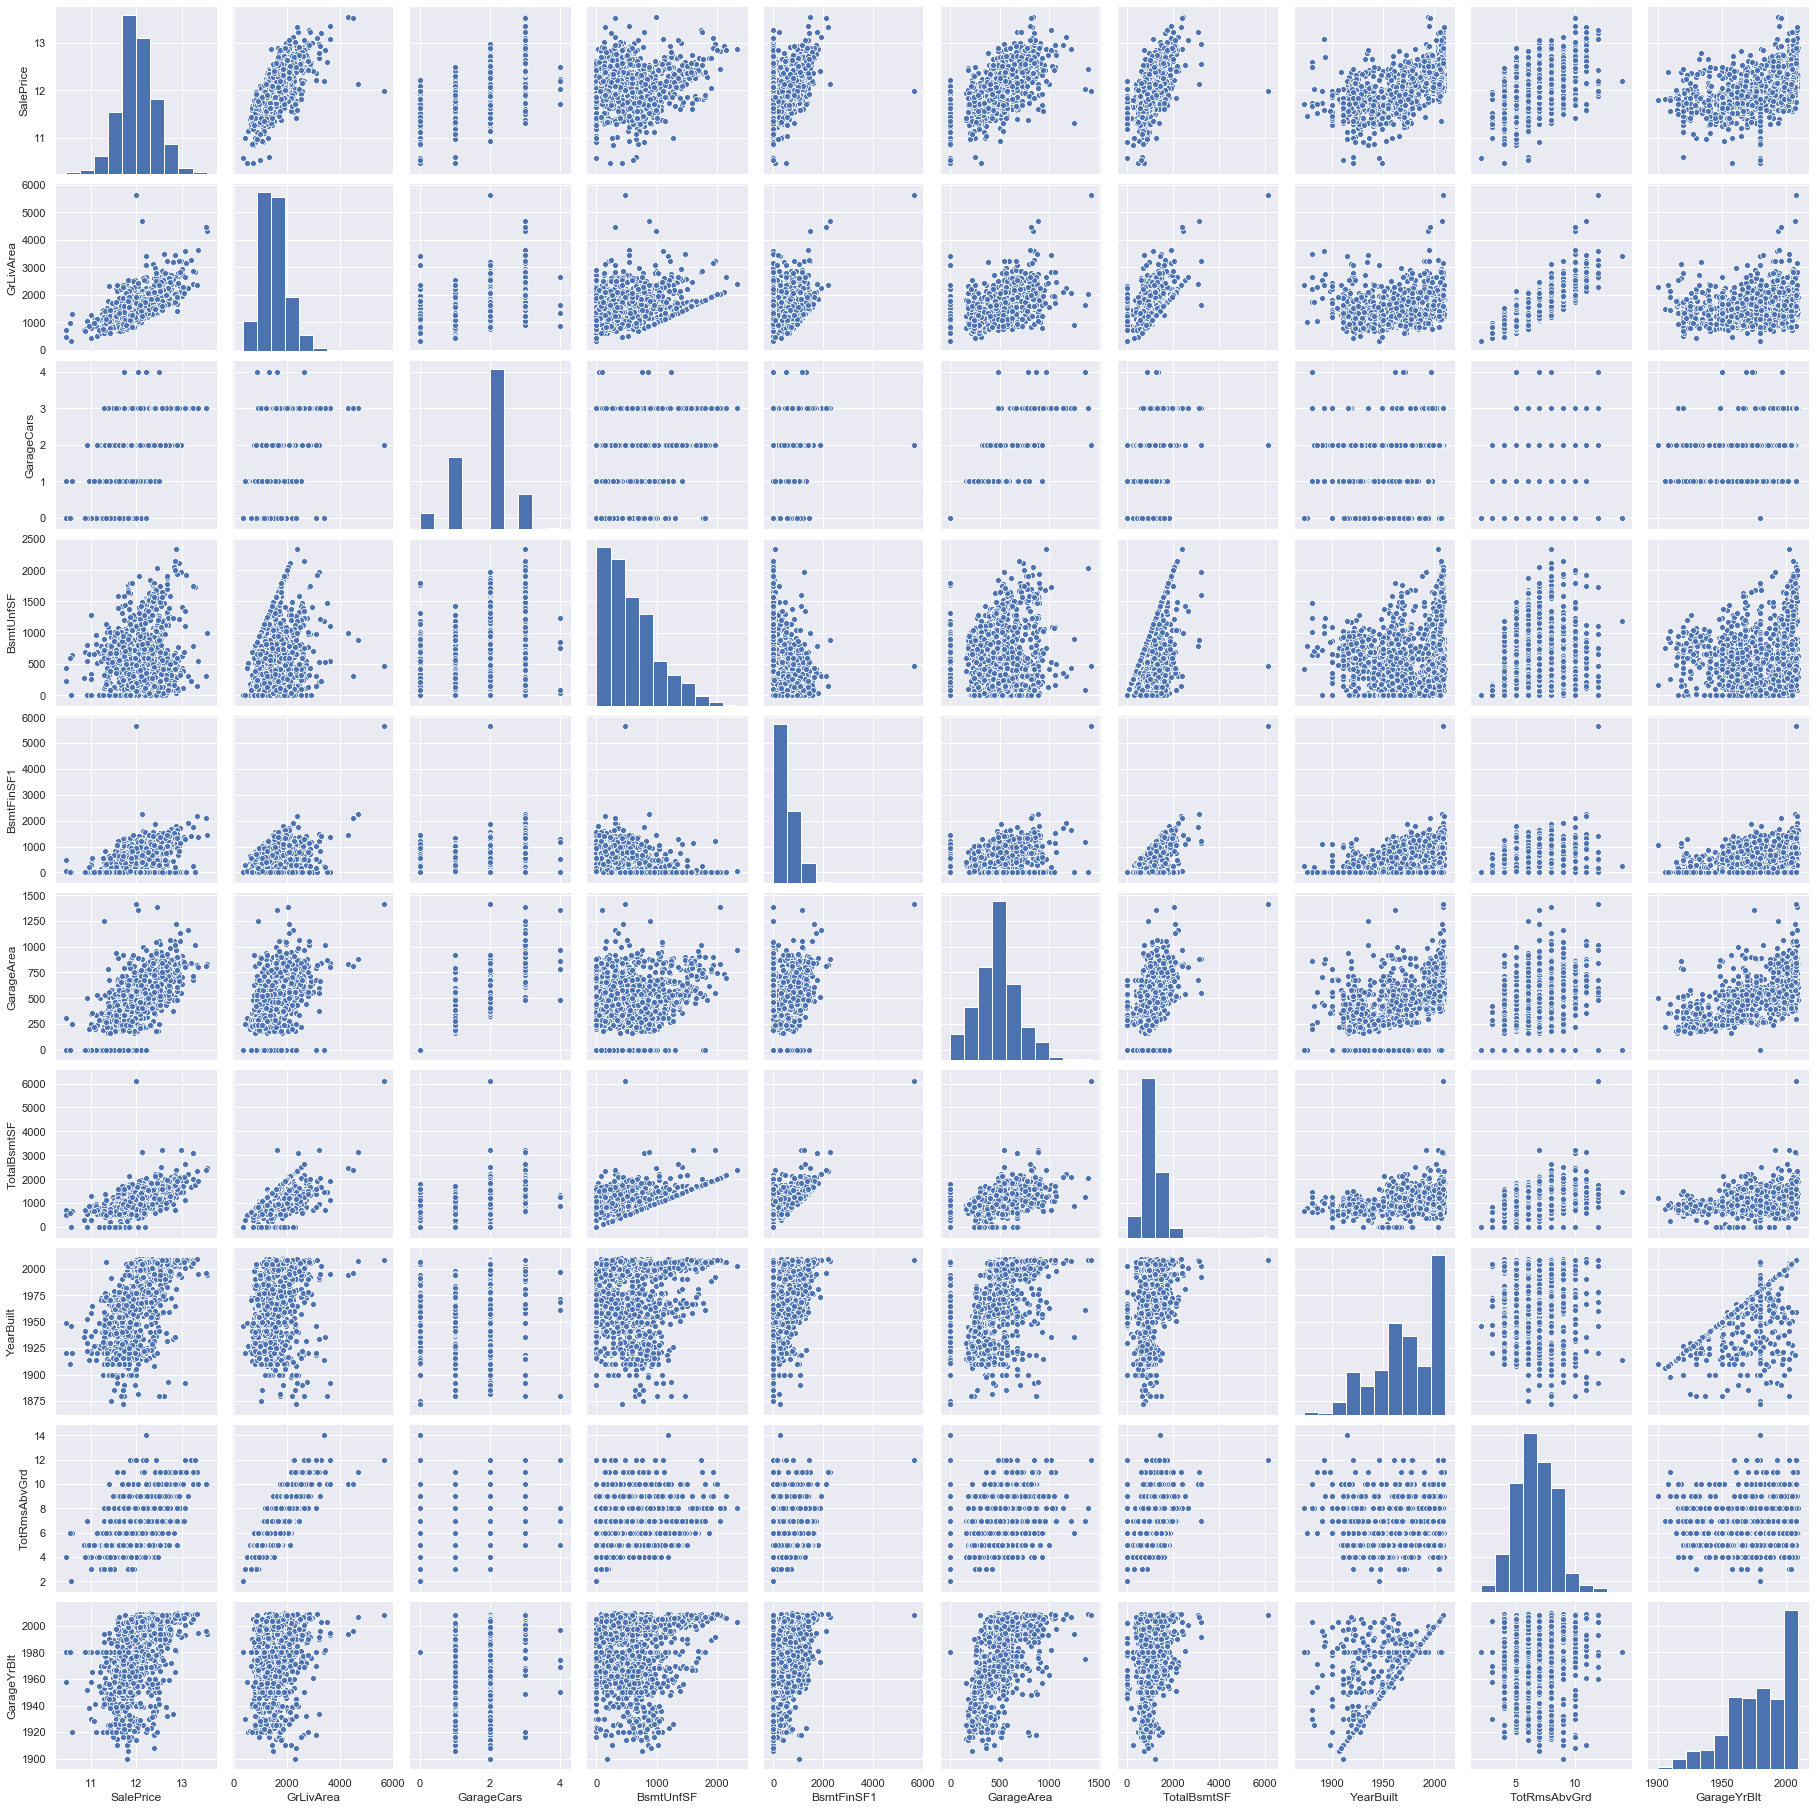

In [28]:
# Pairplot analysis for some of the important variables
plt.figure(figsize=(30,30))
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house_pricing[cols], size = 2.5)
plt.show()

#### Drop the columns that are highly co-related and have no effect on sales price.

In [29]:
house_pricing = house_pricing.drop(columns=['GarageCars', 'BsmtUnfSF', 'TotRmsAbvGrd', 'GarageYrBlt'], axis = 1)
print('Columns after dropping the variables', house_pricing.columns)

Columns after dropping the variables Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchS

### Biv-variate analysis against Sales price. 
#### Plot the graph and see the relationship how the variables are distributed

<font color="red">Observations:</font>
- Some of the variables seems to have high co-relation with Sales Price.

In [30]:
### common function to remove outliers
def handle_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

#### Sales Price vs GrLivArea
<font color="red">Observations</font> One or two values seems to contain outliers, We can safely remove the data as it will not have any impact

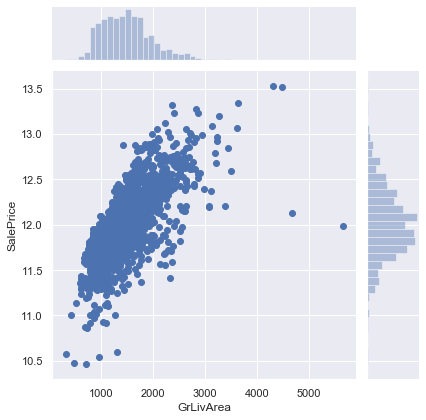

In [31]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=house_pricing)
plt.show()

In [32]:
# Removing some outliers on lower right side of 'GrLivArea'
house_pricing = handle_outliers(house_pricing,'GrLivArea')
print('saphe of the dataset after removing outliers',house_pricing.shape)

saphe of the dataset after removing outliers (1429, 77)


#### Sales Price vs GrLivArea
<font color="red">Observations</font> SalePrice increases with increase in GrLivArea and seems fairly distributed

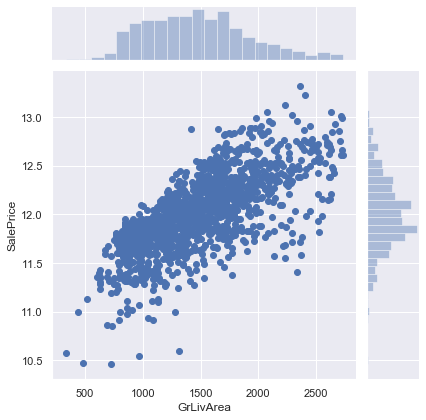

In [33]:
# Again plotting GeLivArea vs SalePrice
sns.jointplot(x = house_pricing['GrLivArea'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs LotFrontage
<font color="red">Observations</font> Most of the LotFrontage seems to be < 200 with some outliers

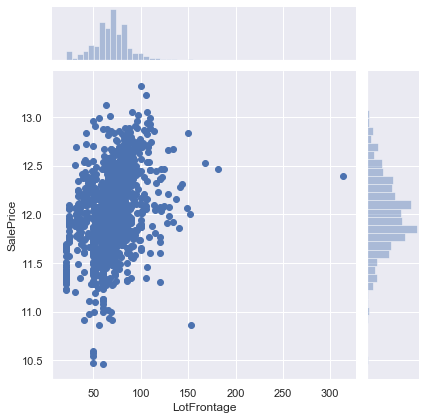

In [34]:
# Lot frontage vs SalePrice 
sns.jointplot(x = house_pricing['LotFrontage'], y = house_pricing['SalePrice'])
plt.show()

In [35]:
# Removing some outliers on lower right side of 'GrLivArea'
print('saphe of the dataset before removing outliers',house_pricing.shape)
#house_pricing = handle_outliers(house_pricing,'LotFrontage')
print('saphe of the dataset after removing outliers',house_pricing.shape)

saphe of the dataset before removing outliers (1429, 77)
saphe of the dataset after removing outliers (1429, 77)


#### Sales Price vs LotArea
<font color="red">Observations</font> Most of the LotArea seems to be < 50000 with some outliers

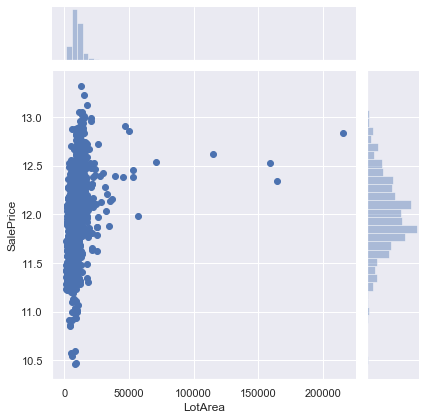

In [36]:
# LotArea vs SalePrice
sns.jointplot(x = house_pricing['LotArea'], y = house_pricing['SalePrice'])
plt.show()

In [37]:
# Removing some outliers on lower right side of 'GrLivArea'
print('saphe of the dataset before removing outliers',house_pricing.shape)
#house_pricing = handle_outliers(house_pricing,'LotArea')
print('saphe of the dataset after removing outliers',house_pricing.shape)

saphe of the dataset before removing outliers (1429, 77)
saphe of the dataset after removing outliers (1429, 77)


#### Sales Price vs 1stFlrSF
<font color="red">Observations</font> SalePrice seems to be fairly distributed across 1stFlrSF

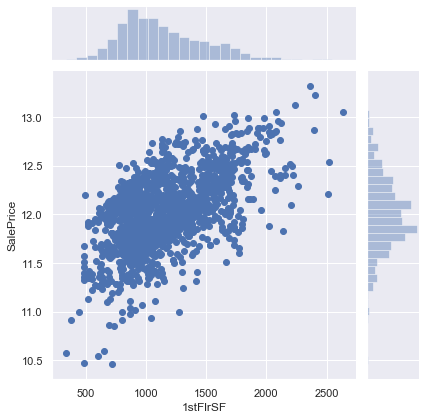

In [38]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = house_pricing['1stFlrSF'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs 2ndFlrSF
<font color="red">Observations</font> SalesPrice seems to be fairly distributed across 2ndFlrSF

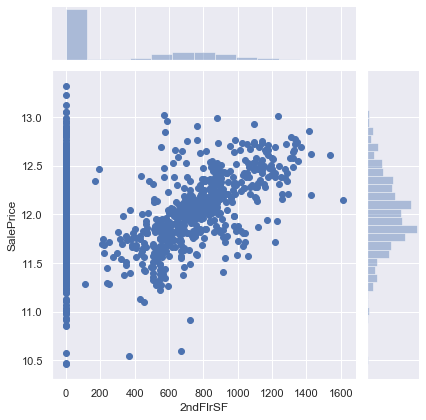

In [39]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = house_pricing['2ndFlrSF'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs 2ndFlrSF
<font color="red">Observations</font> SalesPrice seems to be fairly distributed across OverallQual

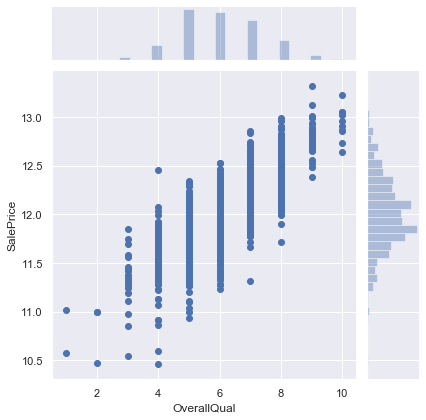

In [40]:
# OverallQual vs SalePrice
sns.jointplot(x = house_pricing['OverallQual'], y = house_pricing['SalePrice'])
plt.show()

#### Sales Price vs 2ndFlrSF
<font color="red">Observations</font> SalesPrice seems to be fairly distributed across OverallCond

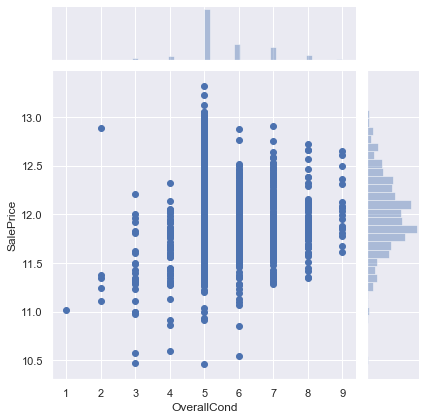

In [41]:
# OverallCond vs SalePrice
sns.jointplot(x = house_pricing['OverallCond'], y = house_pricing['SalePrice'])
plt.show()

### Derive a new column property age and drop the old variables
<font color="red">Observations:</font> As the property age increases, Sales price decreases adn remains constant within in a range

In [42]:
# PropAge -  Property Age from yearsold - yearbuilt
house_pricing['PropertyAge'] = (house_pricing['YrSold'] - house_pricing['YearBuilt'])
house_pricing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge
0,1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,Typ,0,none,Attchd,RFn,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.247694,5
1,2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.109011,31
2,3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.317167,7
3,4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.849398,91
4,5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.429216,8


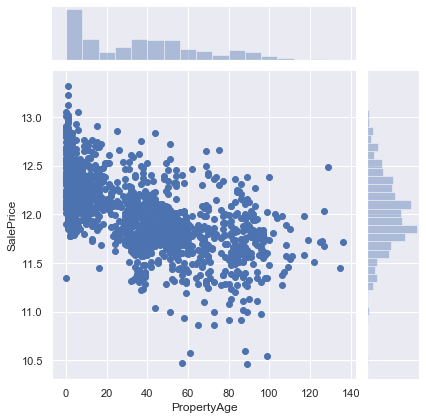

In [43]:
# PropAge vs SalePrice
sns.jointplot(x = house_pricing['PropertyAge'], y = house_pricing['SalePrice'])
plt.show()

In [44]:
house_pricing = house_pricing.drop(columns=['MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd'], axis = 1)
print(house_pricing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'

### Drop the columns which has low variance in data, or contains null values
<font color="red">Observations:</font> Variables dropped as they had very low variance or high percentage of null/none

- Street
- Utilities
- PoolQC
- MiscVal
- Alley
- RoofMatl
- Condition2
- Heating
- GarageCond
- Fence
- Functional

In [45]:
house_pricing.Street.value_counts()

Pave    1423
Grvl       6
Name: Street, dtype: int64

In [46]:
house_pricing.Utilities.value_counts()

AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64

In [47]:
house_pricing = house_pricing.drop(columns=['Street', 'Utilities'], axis = 1)
print(house_pricing.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'M

In [48]:
print(house_pricing.shape)

(1429, 72)


#### Check for columns with low variance and drop the columns as it may not have any significance in predicting dataset

In [49]:
house_pricing_low_variance_df = house_pricing.select_dtypes(include = ['float64', 'int64'])
house_pricing_low_variance_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,PropertyAge
0,1,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,0,12.247694,5
1,2,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,0,12.109011,31
2,3,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,0,12.317167,7
3,4,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,0,11.849398,91
4,5,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,0,12.429216,8


In [50]:
for column_with_low_variance in house_pricing_low_variance_df:
    print(house_pricing[column_with_low_variance].value_counts())

1460    1
498     1
477     1
478     1
479     1
       ..
972     1
973     1
974     1
975     1
1       1
Name: Id, Length: 1429, dtype: int64
20     534
60     283
50     139
120     87
30      69
160     63
70      59
80      57
90      52
190     29
85      20
45      12
75      11
180     10
40       4
Name: MSSubClass, dtype: int64
60.0     150
80.0     110
70.0      94
65.0      74
73.0      70
        ... 
144.0      1
39.0       1
106.0      1
38.0       1
88.5       1
Name: LotFrontage, Length: 112, dtype: int64
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
5350      1
9986      1
9452      1
12180     1
7150      1
Name: LotArea, Length: 1047, dtype: int64
5     396
6     371
7     314
8     157
4     116
9      40
3      20
10     10
2       3
1       2
Name: OverallQual, dtype: int64
5    804
6    248
7    201
8     72
4     56
3     24
9     18
2      5
1      1
Name: OverallCond, dtype: int64
0.0      856
180.0      8
108.0      8
72.0       

In [51]:
#Drop the columns which has low variance in terms of data (i.e some of the values obsserved across most of the data set)
columns_with_low_variance = ['Id', 'PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional']
house_pricing = house_pricing.drop(columns = columns_with_low_variance, axis = 1)
print(house_pricing.shape)

(1429, 62)


### 1.4 Data preparation 
- Prepare the data set for model building i.e. create dummy variables 

In [52]:
# Separate out the numeric and categorical colmun dataset
house_pricing_dtypes = house_pricing.dtypes
numeric_type = house_pricing_dtypes[(house_pricing_dtypes == 'int64') | (house_pricing_dtypes == float)] 
categorical_type = house_pricing_dtypes[house_pricing_dtypes == object]

In [53]:
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropertyAge']


In [54]:
#extract the categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


### Create Dummy variables to convert to numerical for data analysis

In [55]:
house_pricing = pd.get_dummies(house_pricing, drop_first=True )
house_pricing.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,12.247694,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,12.109011,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,12.317167,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,11.849398,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,12.429216,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Create predictor and target variables for model building

In [56]:
X = house_pricing.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,BsmtFinType2_none,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,PavedDrive_P,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,856,856,854,0,1710,1,0,2,1,3,1,0,548,0,61,0,0,0,0,5,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,1262,1262,0,0,1262,0,1,2,0,3,1,1,460,298,0,0,0,0,0,31,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,920,920,866,0,1786,1,0,2,1,3,1,1,608,0,42,0,0,0,0,7,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,756,961,756,0,1717,1,0,1,0,3,1,1,642,0,35,272,0,0,0,91,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,1145,1145,1053,0,2198,1,0,2,1,4,1,1,836,192,84,0,0,0,0,8,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [57]:
# Putting response variable to y
y = house_pricing['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 42)

### Feature scaling: scale the varibles for analysis

In [59]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

In [60]:
columns_to_transform = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']
scaler = StandardScaler()
X_train[columns_to_transform] = scaler.fit_transform(X_train[columns_to_transform]) 
X_test[columns_to_transform] = scaler.fit_transform(X_test[columns_to_transform]) 

scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropertyAge']])


## 1.5 Model building & Evaluation
- At first we use linear regression to predict the prices and observe the linear regression assumption
- Use RFE to check the important and non-important features, its not used in predictions anywhere

### 1.5.1 Model building & Evaluation (Linear Regression)

In [61]:
# Importing the libraries, use RFE for feature elimiation 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [62]:
# perform RFE to understand the relationship between variables and find out the important variables 
lm = LinearRegression()
lm.fit(X_train, y_train) 
rfe = RFE(lm, 100)            
rfe = rfe.fit(X_train, y_train)

In [63]:
# Check the ranks, as RFE print the ranks 1 being highest and higher means in-significant
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 91),
 ('LotFrontage', False, 70),
 ('LotArea', False, 3),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 83),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 99),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 66),
 ('BsmtHalfBath', False, 74),
 ('FullBath', False, 65),
 ('HalfBath', False, 37),
 ('BedroomAbvGr', False, 80),
 ('KitchenAbvGr', False, 34),
 ('Fireplaces', False, 42),
 ('GarageArea', False, 33),
 ('WoodDeckSF', False, 38),
 ('OpenPorchSF', False, 97),
 ('EnclosedPorch', False, 55),
 ('3SsnPorch', False, 73),
 ('ScreenPorch', False, 46),
 ('PoolArea', False, 45),
 ('PropertyAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 92),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 56),
 ('LandContour_HLS', False, 47),
 

In [64]:
# select the columns
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'PropertyAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_CulDSac', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRNe', 'Condition1_RRNn', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'RoofStyle_Mansard', 'Exterior1st_AsphS

In [65]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       ...
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po', 'GarageQual_TA',
       'PavedDrive_P', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Partial'],
      dtype='object', length=110)

In [66]:
## filter the dataset with required columns
X_train_rfe = pd.DataFrame(X_train[col])
X_train_rfe.head()

,OverallQual,OverallCond,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,PropertyAge,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR3,LotConfig_CulDSac,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRNe,Condition1_RRNn,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_2.5Fin,HouseStyle_2.5Unf,RoofStyle_Mansard,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior2nd_Brk Cmn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Wd Sdng,MasVnrType_none,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_none,CentralAir_Y,Electrical_FuseF,Electrical_Mix,GarageType_none,GarageFinish_Unf,GarageFinish_none,GarageQual_none,PavedDrive_Y,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal
582,-0.048191,-0.497375,0.872595,-0.567652,-0.948442,-0.751686,-0.102573,-1.458530,-0.647538,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,1
823,-0.048191,1.285332,-0.985991,-0.659854,-0.589848,0.565175,-0.102573,0.043046,1.089205,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1254,0.681980,-0.497375,-0.985991,-0.737498,-1.105327,1.413282,-0.102573,0.415651,-1.048325,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
595,1.412151,-0.497375,2.252869,1.853876,1.881089,-0.751686,-0.102573,0.794949,-1.181921,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
1418,-0.778363,-0.497375,-0.929049,0.228201,-0.029545,-0.751686,-0.102573,-0.726707,0.287631,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1


#### Calculate r2_score of train & test dataset.
<font color="red">Observations:</font> We can see the difference in r2_score of train and test

In [67]:
#predict the y_train and calculate r2_score
y_train_pred = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9453287478660786

In [68]:
# calculate the r2_score to understand the model
y_test_pred = lm.predict(X_test)
r2_score(y_true=y_test, y_pred=y_test_pred)

-7.135032502105976e+19

In [69]:
y_train_res = y_train - y_train_pred

#### Plot the residuals vs predicted values, and distribution of error terms to check variance

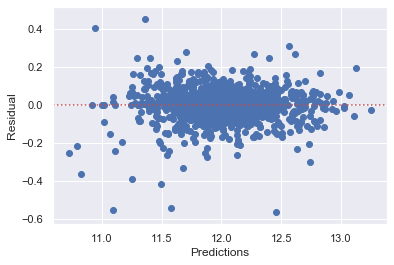

In [70]:
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

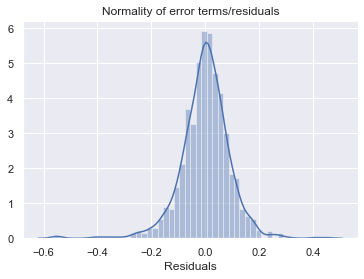

In [71]:
# Distribution of errors
p = sns.distplot(y_train_res, kde = True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### 1.5.2 Model building & Evaluation (Ridge Regression)
 - Use ridge regression to calculate the r2_score, RMSE & RSS for train and test data 
 - Plot the graph of mean_train_score and mean_test_score.

In [72]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [73]:
print(model_cv.best_params_)

{'alpha': 10.0}


In [74]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08294576541962861


### Plot mean score and test score with all the values of alpha
<font color="red">Observations:</font>
- From the plot we can see that best values of alpha comes close to 10
- Best value of r2_score is 93%
- r2_score, RSS & RMSE comes very close to each other

In [75]:
#extract cv_results as dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003255,0.000935,0.000928,0.000043,0.0001,{'alpha': 0.0001},-0.087015,-0.088238,-0.083989,-0.090650,-0.104452,-0.090869,0.007123,26,-0.065321,-0.063595,-0.064547,-0.062506,-0.059750,-0.063144,0.001941
1,0.003893,0.000759,0.001284,0.000332,0.001,{'alpha': 0.001},-0.086996,-0.088199,-0.083978,-0.090630,-0.104421,-0.090845,0.007118,25,-0.065322,-0.063603,-0.064547,-0.062508,-0.059751,-0.063146,0.001941
2,0.004329,0.000346,0.001363,0.000146,0.01,{'alpha': 0.01},-0.086816,-0.087896,-0.083872,-0.090448,-0.104135,-0.090633,0.007073,24,-0.065328,-0.063680,-0.064548,-0.062529,-0.059765,-0.063170,0.001940
3,0.003507,0.000405,0.000978,0.000130,0.05,{'alpha': 0.05},-0.086136,-0.087328,-0.083560,-0.089758,-0.103108,-0.089978,0.006862,23,-0.065380,-0.063951,-0.064571,-0.062635,-0.059877,-0.063283,0.001925
4,0.003263,0.000606,0.000983,0.000171,0.1,{'alpha': 0.1},-0.085503,-0.087106,-0.083187,-0.089253,-0.102149,-0.089440,0.006657,22,-0.065478,-0.064123,-0.064638,-0.062756,-0.060014,-0.063402,0.001911


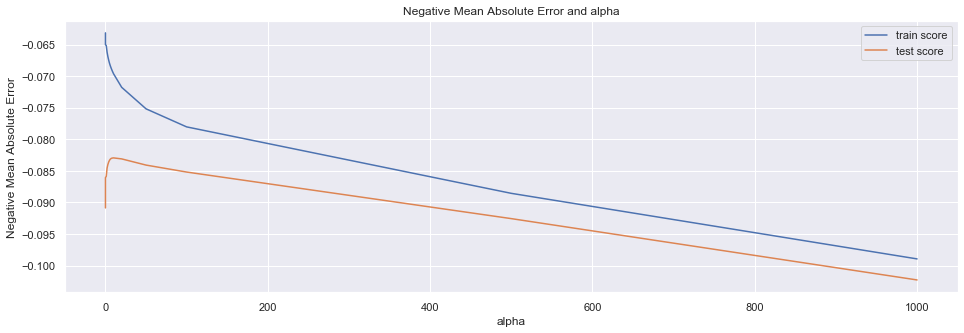

In [76]:
plt.figure(figsize=(16,5))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plot the RMSE score of tarin vs test
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Fit the ridge regression model and calculate the r2_coefficients
- r2_score for train and test data comes very close to each other which is 93%
- RMSE is close to 10 which is good.

In [77]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-1.23969866e-02  8.39313618e-03  2.04813702e-02  7.63064196e-02
  5.40925406e-02  3.00349747e-03  2.97149891e-02  1.16461264e-02
  4.37241691e-02  3.68831111e-02  4.45140672e-02  2.17246447e-03
  7.06705431e-02  8.97470119e-03  2.96177624e-03  9.93537815e-03
  1.62716135e-02  5.55800897e-03 -1.35096440e-02  1.22820274e-02
  1.92335218e-02  1.36850771e-02  1.03718664e-03  1.00521441e-02
  3.23677054e-03  1.15196598e-02  1.08673279e-02 -5.53131101e-02
  5.82379828e-02  3.97858620e-02  5.36168940e-02  2.03215903e-03
  2.05790610e-02 -8.52004071e-03  1.46253957e-05  1.89252634e-02
 -1.18333367e-03 -3.65292664e-03  3.17999077e-02 -1.10626844e-02
  6.89126573e-04 -1.28867637e-02 -3.74902981e-03 -3.73550066e-02
 -4.79933969e-03 -1.46621722e-02  2.03228939e-02  3.38089644e-02
 -1.32330358e-02  6.88210156e-02 -3.77385518e-02 -4.34776922e-03
 -4.71460673e-02 -4.74462030e-02 -2.87865417e-02 -1.16050001e-02
  7.47074322e-03 -2.56992000e-02  1.83106279e-03  5.35884916e-02
 -1.17757665e-02 -1.08154

#### Calculate r2_score, residual sum of squares and rmse for training data
 - For ridge regression r2_score, RSS & RMSE are very close to each other

In [78]:
y_pred_train = ridge.predict(X_train)

#calculate r2_score
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score',r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS', rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.9351945924791404
RSS 10.04628031405889
RMSE 0.1002311344546139


#### Calculate r2_score, residual sum of squares and rmse for test data

In [79]:
y_pred_test = ridge.predict(X_test)

#calculate r2_score
r2_train_lr = r2_score(y_test, y_pred_test)
print('r2_score', r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS', rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.8970717767820721
RSS 5.7508305364599295
RMSE 0.11578082477546738


In [80]:
# lasso model parameters
model_parameters = list(ridge.coef_ )
model_parameters.insert(0, ridge.intercept_)
model_parameters_ridge = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_ridge))

[('constant', 11.785),
 ('MSSubClass', -0.012),
 ('LotFrontage', 0.008),
 ('LotArea', 0.02),
 ('OverallQual', 0.076),
 ('OverallCond', 0.054),
 ('MasVnrArea', 0.003),
 ('BsmtFinSF1', 0.03),
 ('BsmtFinSF2', 0.012),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.037),
 ('2ndFlrSF', 0.045),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.071),
 ('BsmtFullBath', 0.009),
 ('BsmtHalfBath', 0.003),
 ('FullBath', 0.01),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.006),
 ('KitchenAbvGr', -0.014),
 ('Fireplaces', 0.012),
 ('GarageArea', 0.019),
 ('WoodDeckSF', 0.014),
 ('OpenPorchSF', 0.001),
 ('EnclosedPorch', 0.01),
 ('3SsnPorch', 0.003),
 ('ScreenPorch', 0.012),
 ('PoolArea', 0.011),
 ('PropertyAge', -0.055),
 ('MSZoning_FV', 0.058),
 ('MSZoning_RH', 0.04),
 ('MSZoning_RL', 0.054),
 ('MSZoning_RM', 0.002),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.009),
 ('LotShape_Reg', 0.0),
 ('LandContour_HLS', 0.019),
 ('LandContour_Low', -0.001),
 ('LandContour_Lvl', -0.004),
 ('LotConfig_CulDSac', 0.032),
 ('Lo

### 1.5.3 Model building & Evaluation (Lasso Regression)
 - Use Lasso regression to calculate the r2_score, RMSE & RSS for train and test data 
 - Plot the graph of mean_train_score and mean_test_score.

In [81]:
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [82]:
# Printing the best hyperparameter alpha and best score
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.08435705606736534


#### Plot the graph between mean_train_score and mean_test_score to observe the behavior of alpha

In [83]:
#extract cv_results as dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.077001,0.006938,0.001354,0.000202,0.0001,{'alpha': 0.0001},-0.082068,-0.084681,-0.081210,-0.085251,-0.092965,-0.085235,0.004154,2,-0.067077,-0.065941,-0.066458,-0.064653,-0.062346,-0.065295,0.001677
1,0.015898,0.003701,0.001585,0.000455,0.001,{'alpha': 0.001},-0.085012,-0.080584,-0.084911,-0.087140,-0.084139,-0.084357,0.002134,1,-0.075763,-0.075342,-0.075935,-0.074415,-0.075448,-0.075381,0.000528
2,0.005206,0.000549,0.001444,0.000192,0.01,{'alpha': 0.01},-0.090244,-0.087754,-0.095488,-0.100530,-0.094638,-0.093731,0.004428,3,-0.091402,-0.091347,-0.090282,-0.089936,-0.089715,-0.090536,0.000708
3,0.004029,0.000727,0.001179,0.000331,0.05,{'alpha': 0.05},-0.107707,-0.113720,-0.118392,-0.133993,-0.126879,-0.120138,0.009340,4,-0.120384,-0.117905,-0.118787,-0.116334,-0.116803,-0.118042,0.001450
4,0.004037,0.000861,0.001100,0.000229,0.1,{'alpha': 0.1},-0.140827,-0.143676,-0.152338,-0.170228,-0.162305,-0.153875,0.011092,5,-0.153805,-0.152774,-0.152740,-0.150461,-0.151781,-0.152312,0.001126


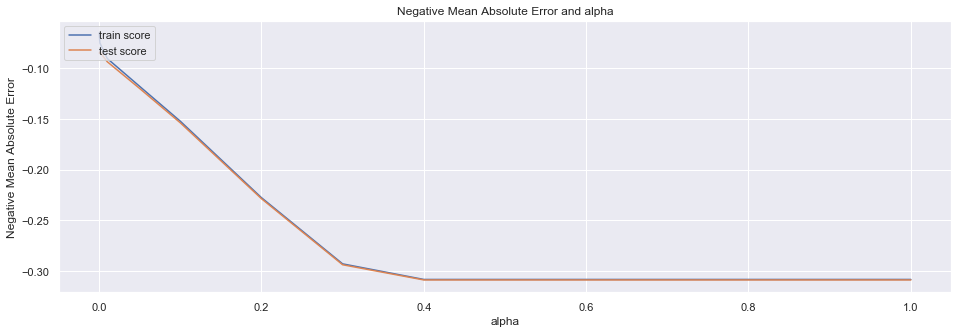

In [84]:
# plotting mean test and train scoes with alpha 
plt.figure(figsize=(16,5))
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

### Benefits of Lasso regression.
<font color="red">We can see the benefits of lasso regression</font>
- Some of the coefficients are zero
- r2_score of both training and test dataset are close to each other.

In [85]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 0.001
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-0.01145677  0.00944746  0.01891923  0.09031469  0.05913272  0.00224218
  0.03260479  0.00228547  0.04417475  0.00362721  0.         -0.00222035
  0.12078288  0.0111721   0.00056092  0.00644557  0.01041215  0.
 -0.00801899  0.01250804  0.02595518  0.01173898  0.          0.0082651
  0.00148622  0.01125718  0.00951566 -0.06602933  0.05479021  0.
  0.05688909 -0.          0.         -0.         -0.0059244   0.
  0.         -0.          0.01378181  0.          0.         -0.01000187
 -0.         -0.         -0.         -0.          0.01293552  0.01788233
 -0.          0.07144442 -0.01957277  0.         -0.02356549 -0.
 -0.         -0.          0.         -0.          0.          0.04451018
 -0.          0.         -0.         -0.          0.03488752  0.01218853
 -0.          0.          0.          0.02442077  0.          0.
 -0.          0.         -0.          0.          0.          0.
 -0.03141715  0.          0.          0.         -0.          0.
 -0.         -0.          0.       

#### Calculate r2_score, residual sum of squares and rmse for training data
- For lasso regression r2_score, RSS & RMSE are very close to each other

In [86]:
y_pred_train = lasso.predict(X_train)

#calculate r2_score
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_score', r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS',rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.9242997728244056
RSS 11.735219808611927
RMSE 0.10832921955138386


#### Calculate r2_score, residual sum of squares and rmse for test data

In [87]:
y_pred_test = lasso.predict(X_test)

#calculate r2_score
r2_train_lr = r2_score(y_test, y_pred_test)
print('r2_score',r2_train_lr)

#Calculate residual sum of square(RSS)
rss1_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS', rss1_lr)

#Calculate mean_squared_error(RMSE)
mse_train_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE', mse_train_lr**0.5) 

r2_score 0.9015572087888902
RSS 5.500219396506511
RMSE 0.11322996173399032


In [88]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters_lasso = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_lasso))

[('constant', 11.825),
 ('MSSubClass', -0.011),
 ('LotFrontage', 0.009),
 ('LotArea', 0.019),
 ('OverallQual', 0.09),
 ('OverallCond', 0.059),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', 0.033),
 ('BsmtFinSF2', 0.002),
 ('TotalBsmtSF', 0.044),
 ('1stFlrSF', 0.004),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.002),
 ('GrLivArea', 0.121),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.001),
 ('FullBath', 0.006),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.008),
 ('Fireplaces', 0.013),
 ('GarageArea', 0.026),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.008),
 ('3SsnPorch', 0.001),
 ('ScreenPorch', 0.011),
 ('PoolArea', 0.01),
 ('PropertyAge', -0.066),
 ('MSZoning_FV', 0.055),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.057),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.006),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.014),
 ('LotConfig_FR2', 

In [89]:
lasso_parameters = list(zip(cols, model_parameters_lasso))
lasso_df = pd.DataFrame(lasso_parameters)
lasso_df.columns = ['Variable', 'Coeff']
res = lasso_df.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.825
13,GrLivArea,0.121
203,SaleType_New,0.094
4,OverallQual,0.090
50,Neighborhood_Crawfor,0.071
5,OverallCond,0.059
31,MSZoning_RL,0.057
29,MSZoning_FV,0.055
209,SaleCondition_Normal,0.049
134,Foundation_PConc,0.048


In [90]:
res.reset_index(inplace=True, drop=True)
res = res.head(17)
res.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
res

,Variable,Coeff
C,constant,11.825
x1,GrLivArea,0.121
x2,SaleType_New,0.094
x3,OverallQual,0.090
x4,Neighborhood_Crawfor,0.071
x5,OverallCond,0.059
x6,MSZoning_RL,0.057
x7,MSZoning_FV,0.055
x8,SaleCondition_Normal,0.049
x9,Foundation_PConc,0.048


### Observations Ridge vs Lasso regression:

<font color="red">Observations: </font>
  - #### Ridge and Lasso regression for both the models parameters are close
  - #### r2_score for Ridge regression is better compared to Lasso
  - #### RSS (residual sum of squares) are less for ridge compared to lasso
  - #### RMSE of ridge regression are slightly better than laso
  
#### Print the coefficients for ridge regression

In [91]:
ridge_parameters = list(zip(cols, model_parameters_ridge))
ridge_df = pd.DataFrame(ridge_parameters)
ridge_df.columns = ['Variable', 'Coeff']
res = ridge_df.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.785
4,OverallQual,0.076
13,GrLivArea,0.071
50,Neighborhood_Crawfor,0.069
209,SaleCondition_Normal,0.067
29,MSZoning_FV,0.058
5,OverallCond,0.054
31,MSZoning_RL,0.054
60,Neighborhood_NridgHt,0.054
203,SaleType_New,0.053


### Take the top 16 features afftecting the housing price prediction

In [92]:
res.reset_index(inplace=True, drop=True)
res = res.head(17)
res.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16']), inplace = True) 
res

,Variable,Coeff
C,constant,11.785
x1,OverallQual,0.076
x2,GrLivArea,0.071
x3,Neighborhood_Crawfor,0.069
x4,SaleCondition_Normal,0.067
x5,MSZoning_FV,0.058
x6,OverallCond,0.054
x7,MSZoning_RL,0.054
x8,Neighborhood_NridgHt,0.054
x9,SaleType_New,0.053


### Equation for models Hence the equation:

Log(Y) = constant + 0.102(x1) + 0.083(x2) + 0.073(x3) + 0.066(x4) + 0.065(x5) + 0.061(x6) + 0.059(x7) + 0.055(x8) + 0.055(x9) + 0.053(x10)
+ 0.050(x11) + 0.047(x12) + 0.046(x13) + 0.045(x14) + 0.043(x15) + 0.041(x16) + Error term(RSS + alpha * (sum of absolute value of coefficients)

### Top 5 features affecting the hosing price
- Neighborhood_Crawfor
- SaleCondition_Normal
- OverallQual
- GrLivArea
- SaleType_New